In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importación y configuración de librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from dateutil.tz import gettz

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Diccionario para interpretar PDT
tzinfos = {
    "PDT": gettz("America/Los_Angeles"),
    "PST": gettz("America/Los_Angeles")
}

Leemos data set

In [4]:
ROOT_PATH = '/content/drive/Othercomputers/Mi MacBook Pro/Google Drive/tp3'

In [5]:
testing_csv = '/trainingandtestdata/testdata.manual.2009.06.14.csv'

In [6]:
df = pd.read_csv(ROOT_PATH + testing_csv, encoding='latin1', names=['Polarity', 'ID', 'Date', 'Query', 'User', 'Text'])

In [7]:
df

,Polarity,ID,Date,Query,User,Text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
5,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
6,0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non lo...
7,4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.
8,4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter
9,4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes abo...


In [ ]:
df.shape

(498, 6)

Validamos que no existan valores nulos

In [ ]:
df.isna().sum()

,0
Polarity,0
ID,0
Date,0
Query,0
User,0
Text,0


Revisamos que no exista una cantidad de usuarios repetidos que pueda sesgar el modelo

In [8]:
df.User.nunique()

490

Graficamos la relación de polaridad y temporalidad.

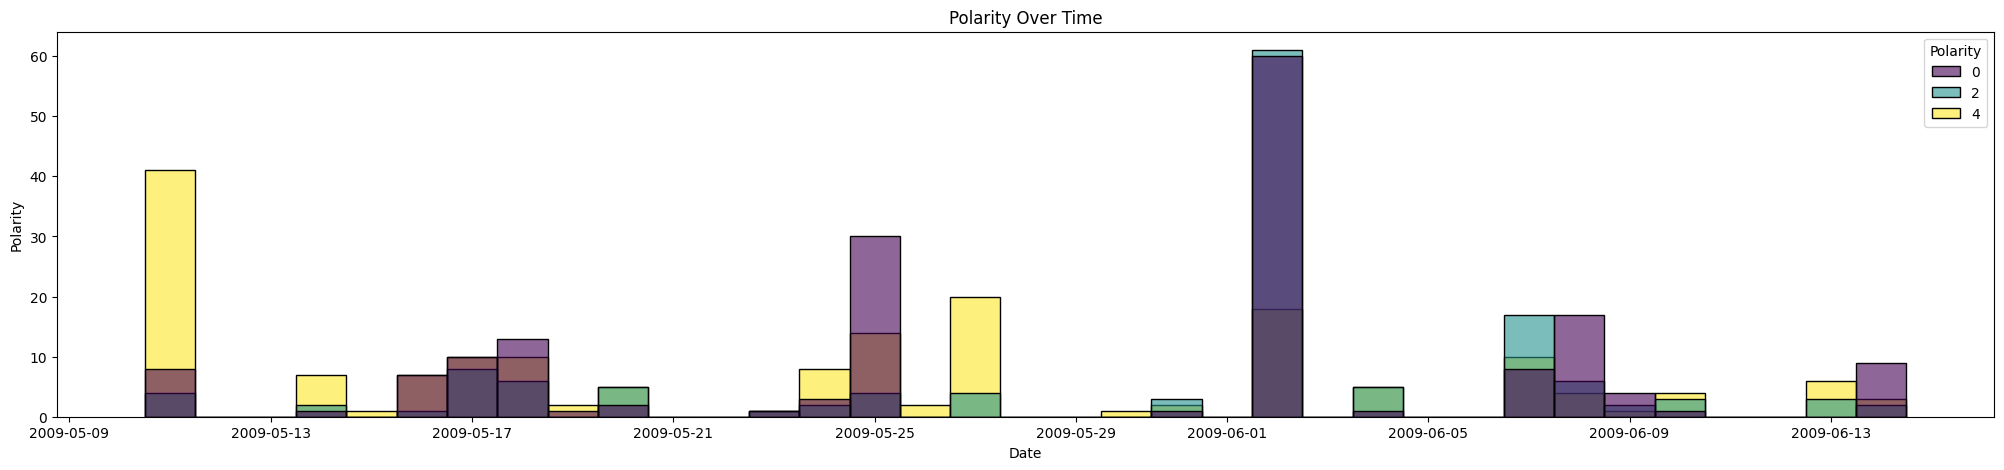

In [22]:
df_copy = df.copy()

df_copy['DateOnly'] = df_copy.Date.apply(lambda x: parser.parse(x, tzinfos=tzinfos).date())

plt.figure(figsize=(25, 5))
sns.histplot(data=df_copy, x='DateOnly', hue='Polarity', palette='viridis', alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Polarity")
plt.title("Polarity Over Time")
plt.show()


En la gráfica se puede ver una mayor cantidad de tweets entre las fechas 09 de Mayo y 13 de Mayo, al igual que entre 01 y 06 de Junio, lo que puede darse por un trending topic.

Descartamos el dato fecha para no dar un sesgo por temporalidad.

Definimos una función para agrupar por momentos del día.

In [23]:
def TimeOfDay(fecha_str):
    dt = parser.parse(fecha_str, tzinfos=tzinfos)  # reconoce PDT automáticamente
    hora = dt.hour

    if 5 <= hora < 12:
        return "morning"
    elif 12 <= hora < 14:
        return "noon"
    elif 14 <= hora < 19:
        return "after noon"
    elif 19 <= hora < 24:
        return "night"
    else:
        return "early morning"

In [24]:
df.loc[:, "TimeOfDay"] = df.Date.apply(TimeOfDay)
df

,Polarity,ID,Date,Query,User,Text,TimeOfDay
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,early morning
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,early morning
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",early morning
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,early morning
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,early morning
5,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...,early morning
6,0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non lo...,early morning
7,4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.,early morning
8,4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter,early morning
9,4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes abo...,early morning


In [25]:
df.groupby('TimeOfDay').Polarity.value_counts(normalize=True) * 100

TimeOfDay      Polarity
after noon     4           40.170940
               0           38.461538
               2           21.367521
early morning  0           35.856574
               2           32.669323
               4           31.474104
morning        4           48.387097
               2           37.096774
               0           14.516129
night          0           48.529412
               4           38.235294
               2           13.235294
Name: proportion, dtype: float64

Observamos que hay una distribución equilibrada en los diferentes momentos del día.

La clase con mayor variación es *Neutro*, variando entre 13% y 31%.

descartamos este dato al no presentar una variación considerable para las clases objetivo.

Revisamos la distribución de las polaridades

In [27]:
df.Polarity.value_counts(normalize=True) * 100

,proportion
Polarity,
4,36.546185
0,35.542169
2,27.911647


Exportamos nuestro dataframe con los datos que nos interesan.
Para este caso la Polaridad y el tweet

In [28]:
df = df[['Text', 'Polarity']]

In [29]:
df.to_csv(ROOT_PATH + '/trainingandtestdata/tweets_cleaned.csv', index=False)